<a href="https://colab.research.google.com/github/Ashutoshgoswami/LSTM_WEATHER/blob/main/LSTM_WEATHER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
!unzip /content/testset.csv.zip

Archive:  /content/testset.csv.zip
  inflating: testset.csv             


In [ ]:
data_path = '/content/testset.csv'

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [ ]:
print(len(df))
df.head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


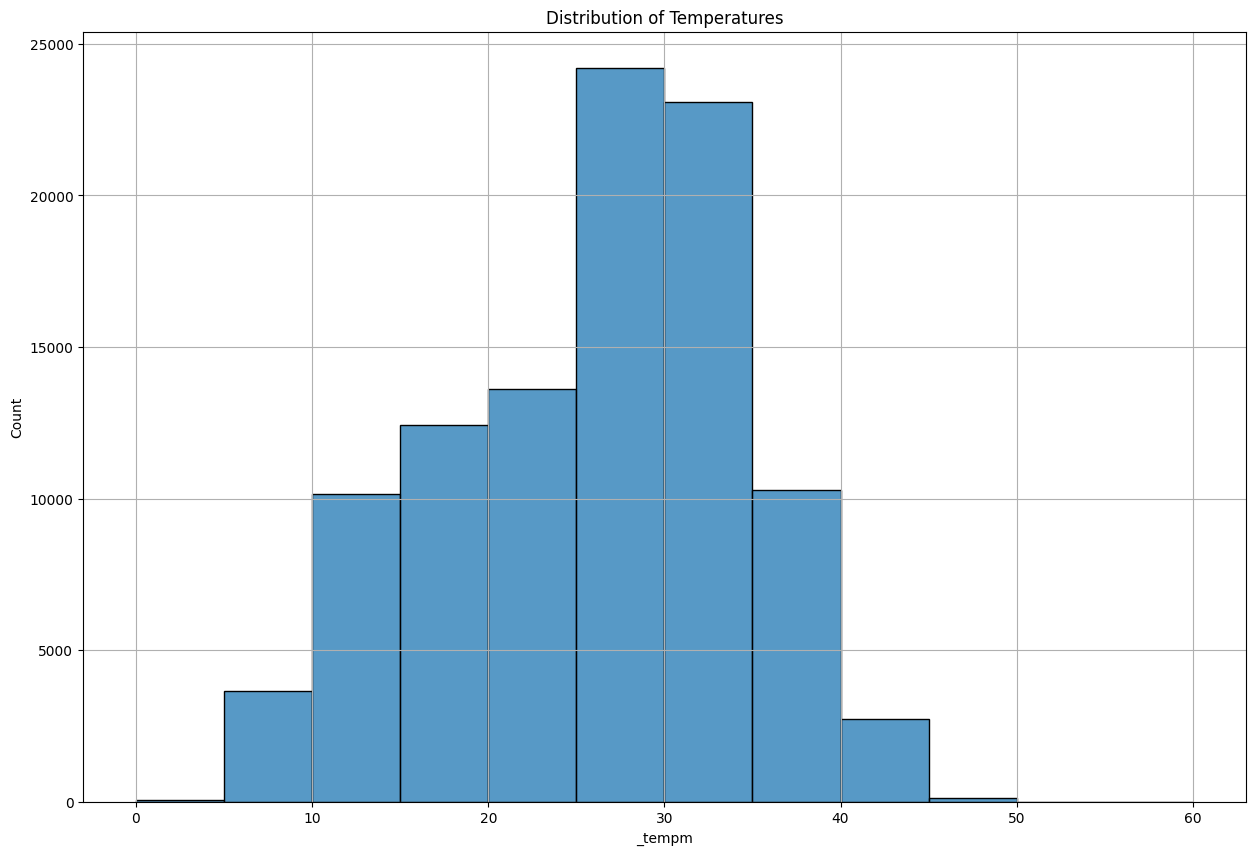

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df['_tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [ ]:
df.index = pd.to_datetime(df.datetime_utc)

# filter the columns by only the required_columns
required_cols = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm', '_thunder', '_tornado']
df = df[required_cols]
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [ ]:
df.isna().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [ ]:
df = df.fillna(method='ffill')
df.tail()


,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
2017-04-24 06:00:00,17.0,0,0,25.0,0,0,34.0,0,0
2017-04-24 09:00:00,14.0,0,0,16.0,0,0,38.0,0,0
2017-04-24 12:00:00,12.0,0,0,14.0,0,0,36.0,0,0
2017-04-24 15:00:00,15.0,0,0,27.0,0,0,32.0,0,0
2017-04-24 18:00:00,15.0,0,0,30.0,0,0,30.0,0,0


In [ ]:
df_final = df.resample('D').mean()
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [ ]:
df_final.isna().sum()

_dewptm     141
_fog        141
_hail       141
_hum        141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [ ]:
df_final = df_final.fillna(method='ffill')
df_final.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df_final.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][6]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (5976, 10, 9)
Train Y shape: (5976,)
Test X shape: (1494, 10, 9)
Test Y shape: (1494,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           70656     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/dl/weather_prediction/best_model_weights.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
75/75 [==============================] - 13s 56ms/step - loss: 0.0325 - val_loss: 0.0045
Epoch 2/100
 3/75 [>.............................] - ETA: 2s - loss: 0.0111

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 4s 55ms/step - loss: 0.0099 - val_loss: 0.0049
Epoch 3/100
75/75 [==============================] - 5s 71ms/step - loss: 0.0090 - val_loss: 0.0041
Epoch 4/100
75/75 [==============================] - 3s 46ms/step - loss: 0.0083 - val_loss: 0.0041
Epoch 5/100
75/75 [==============================] - 3s 45ms/step - loss: 0.0083 - val_loss: 0.0039
Epoch 6/100
75/75 [==============================] - 3s 46ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 7/100
75/75 [==============================] - 6s 76ms/step - loss: 0.0079 - val_loss: 0.0050
Epoch 8/100
75/75 [==============================] - 3s 45ms/step - loss: 0.0074 - val_loss: 0.0036
Epoch 9/100
75/75 [==============================] - 4s 49ms/step - loss: 0.0073 - val_loss: 0.0040
Epoch 10/100
75/75 [==============================] - 4s 57ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 11/100
75/75 [==============================] - 6s 83ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 12/1

In [ ]:
best_model = tf.keras.models.load_model('/content/drive/MyDrive/dl/weather_prediction/best_model_weights.h5')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

47/47 [==============================] - 2s 8ms/step - loss: 0.0021
Test Loss: 0.0020607993938028812


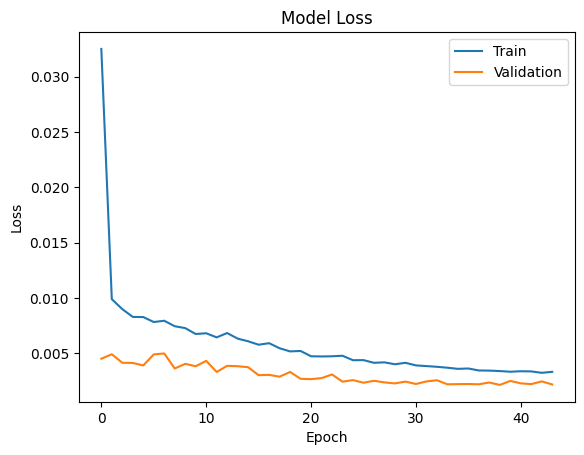

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

47/47 [==============================] - 2s 13ms/step
Mean Absolute Error (MAE): 0.03520112304134434
Mean Squared Error (MSE): 0.0020607994485279677
Root Mean Squared Error (RMSE): 0.045396028995144146


In [ ]:
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 [==============================] - 0s 8ms/step


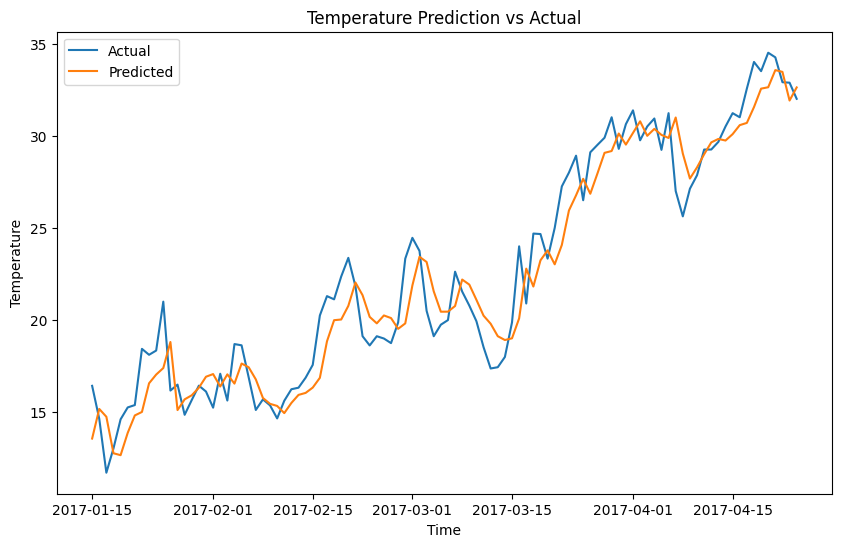

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
!pip install joblib

In [ ]:
import joblib


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Assuming df_final is your full dataset from which you will derive features
scaler = MinMaxScaler()
scaler.fit(df_final)  # Fit scaler to the entire dataset

# Save the fitted scaler to a file for later use
joblib.dump(scaler, '/content/drive/MyDrive/dl/weather_prediction/scaler.gz')


['/content/drive/MyDrive/dl/weather_prediction/scaler.gz']

In [ ]:
!pip install pandas requests


In [ ]:
import requests
import pandas as pd


In [ ]:
# Define the URL with your API key and parameters
url = "https://api.weatherbit.io/v2.0/history/daily?city=Bhopal&start_date=2024-04-29&end_date=2024-05-09&key=fcac888d541149bcabe62e93c304cd29&contentType=csv"

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Data fetched successfully!")
else:
    print("Failed to fetch data:", response.status_code)
    print(response.text)


Data fetched successfully!


In [ ]:
# Install necessary packages
!pip install requests pandas

# Import necessary libraries
import requests
import pandas as pd
from google.colab import files

# Define the API request
url = "https://api.weatherbit.io/v2.0/forecast/daily"
params = {
    "city": "bhopal",
    "key": "fcac888d541149bcabe62e93c304cd29"  # Replace with your actual API key
}

response = requests.get(url, params=params)
data = response.json()

# Initialize an empty list to hold the data
forecast_list = []

# Loop through each day's forecast in the data
for day in data['data']:
    # Define thunderstorm likelihood
    thunderstorm_likelihood = (day['rh'] > 70) and (day['clouds'] > 50) and (day['precip'] > 0.1)

    # Append each day's data to the forecast list
    forecast_list.append({
        "Date": day["datetime"],
        "Temperature (°C)": day["temp"],
        "Humidity (%)": day["rh"],
        "Precipitation (mm)": day["precip"],
        "Wind Speed (m/s)": day["wind_spd"],
        "Wind Direction": day["wind_cdir_full"],
        "Thunderstorm Likelihood": "Yes" if thunderstorm_likelihood else "No"
    })

# Convert the list of dictionaries to a pandas DataFrame
forecast_df = pd.DataFrame(forecast_list)

# Write the DataFrame to a CSV file
forecast_df.to_csv('bhopal_weather_forecast.csv', index=False)

# Download the CSV file to your local machine
files.download('bhopal_weather_forecast.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/bhopal_weather_forecast.csv")

In [ ]:
df.head()

,Date,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction,Thunderstorm Likelihood
0,2024-04-29,33.1,29,0.0,1.8,west,No
1,2024-04-30,32.7,27,0.0,1.9,west-northwest,No
2,2024-05-01,30.9,21,0.0,2.3,west-northwest,No
3,2024-05-02,29.7,18,0.0,1.6,west,No
4,2024-05-03,30.9,21,0.0,1.1,west-northwest,No


In [ ]:

import requests
import pandas as pd

# API configuration
api_url = "https://api.weatherbit.io/v2.0/forecast/hourly"
api_key = "fcac888d541149bcabe62e93c304cd29"
city = "Gandhinagar"
hours = "240"  # 10 days * 24 hours/day

# Construct the API request URL with parameters
params = {
    "city": city,
    "key": api_key,
    "hours": hours
}

# Send the request to the API
response = requests.get(api_url, params=params)
data = response.json()

# Function to determine thunderstorm presence
def is_thunderstorm(code):
    # Thunderstorm codes are in the range of 200 to 299
    return 'Yes' if 200 <= int(code) < 300 else 'No'

# Check if the API request was successful
if response.status_code == 200:
    # Create a DataFrame from the data
    df = pd.DataFrame(data['data'])

    # Convert 'timestamp_local' to datetime type for better handling
    df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

    # Set timestamp as index and ensure it covers exactly 10 days in hourly intervals
    df.set_index('timestamp_local', inplace=True)
    df = df.resample('H').first().reset_index()  # Resample and take the first available data per hour

    # Add a 'thunderstorm' column based on the weather code
    df['thunderstorm'] = df['weather'].apply(lambda x: is_thunderstorm(x['code']) if pd.notnull(x) else 'No')

    # Select and rename the necessary columns
    df = df[['timestamp_local', 'temp', 'rh', 'precip', 'wind_spd', 'wind_dir', 'clouds', 'thunderstorm']]

    # Rename columns for clarity
    df.rename(columns={
        'timestamp_local': 'Datetime',
        'temp': 'Temperature (°C)',
        'rh': 'Relative Humidity (%)',
        'precip': 'Precipitation (mm)',
        'wind_spd': 'Wind Speed (m/s)',
        'wind_dir': 'Wind Direction (degrees)',
        'clouds': 'Cloud Coverage (%)',
        'thunderstorm': 'Thunderstorm Occurrence'
    }, inplace=True)

    # Save DataFrame to CSV
    df.to_csv('Gandhinagar_weather_hourly_10_days.csv', index=False)

    # Display a sample of the DataFrame to verify
    print(df.head())
else:
    print("Failed to fetch data:", response.status_code)
    print(response.text)


             Datetime  Temperature (°C)  Relative Humidity (%)  \
0 2024-05-03 15:00:00              41.2                     11   
1 2024-05-03 16:00:00              40.8                     11   
2 2024-05-03 17:00:00              39.8                     12   
3 2024-05-03 18:00:00              38.6                     13   
4 2024-05-03 19:00:00              36.6                     17   

   Precipitation (mm)  Wind Speed (m/s)  Wind Direction (degrees)  \
0                   0              2.02                       279   
1                   0              2.08                       280   
2                   0              2.04                       285   
3                   0              1.60                       290   
4                   0              0.90                       286   

   Cloud Coverage (%) Thunderstorm Occurrence  
0                  18                      No  
1                  74                      No  
2                  77                      N

In [ ]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# List of cities (expand this list as necessary)
cities = ["Delhi", "Mumbai", "Kolkata", "Bengaluru", "Chennai", "Hyderabad"]

# API key
api_key = "fcac888d541149bcabe62e93c304cd29"

# Create an empty DataFrame to store data
temperature_data = pd.DataFrame(columns=['city', 'temperature'])

for city in cities:
    response = requests.get(f"https://api.weatherbit.io/v2.0/current?city={city}&key={api_key}")
    data = response.json()
    # Extract the relevant data
    temp = data['data'][0]['temp']
    # Create a DataFrame for the current city's data and append it
    new_row = pd.DataFrame({'city': [city], 'temperature': [temp]})
    temperature_data = pd.concat([temperature_data, new_row], ignore_index=True)

print(temperature_data)


        city temperature
0      Delhi          37
1     Mumbai          38
2    Kolkata          42
3  Bengaluru        32.8
4    Chennai        33.9
5  Hyderabad          40


In [ ]:
!unzip /content/ne_50m_coastline.zip

Archive:  /content/ne_50m_coastline.zip
  inflating: ne_50m_coastline.README.html  
 extracting: ne_50m_coastline.VERSION.txt  
 extracting: ne_50m_coastline.cpg    
  inflating: ne_50m_coastline.dbf    
  inflating: ne_50m_coastline.prj    
  inflating: ne_50m_coastline.shp    
  inflating: ne_50m_coastline.shx    


In [ ]:
!pip install pandas geopandas matplotlib folium


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/bhopal_weather_hourly_10_days.csv")


<Axes: >

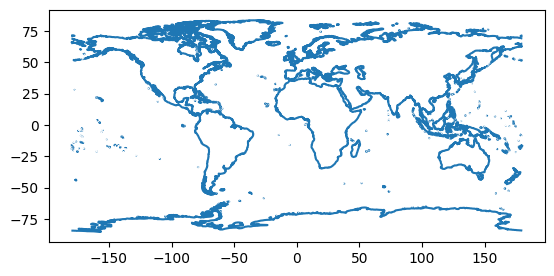

In [ ]:
import geopandas as gpd

# Adjust the path to where you've saved your India shapefile
india_map = gpd.read_file("/content/ne_50m_coastline.shp")
india_map.plot()


In [ ]:
!pip install mpl_toolkits.basemap

ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap


In [ ]:
import requests
import folium

# API Key
API_KEY = 'fcac888d541149bcabe62e93c304cd29'

# List of cities and their coordinates
cities = [
    {"name": "Delhi", "lat": 28.7041, "lon": 77.1025},
    {"name": "Mumbai", "lat": 19.0760, "lon": 72.8777},
    {"name": "Kolkata", "lat": 22.5726, "lon": 88.3639},
    {"name": "Bhopal", "lat": 23.2599, "lon": 77.4126}
]

# Base map
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Fetch and plot data
for city in cities:
    url = f"https://api.weatherbit.io/v2.0/forecast/hourly?city={city['name']}&key={API_KEY}&hours=24"
    response = requests.get(url)
    data = response.json()
    # Example: Use first hour's temperature for heatmap point
    temp = data['data'][0]['temp']
    # Add heatmap point
    folium.Circle(
        location=[city['lat'], city['lon']],
        radius=20000,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{city['name']} Temp: {temp}°C"
    ).add_to(map)

# Save to HTML file
map.save("India_Weather_Heatmap.html")


In [ ]:
import folium
from folium.plugins import HeatMap

# create a map object
mapObj = folium.Map([24.2170111233401, 81.0791015625000], zoom_start=6)

# data for heatmap.
# each list item should be in the format [lat, long, value]
data = [
    [24.399, 80.142, 0.78],
    [22.252, 80.885, 0.68],
    [24.311, 80.543, 0.58],
    [23.195, 82.994, 0.46],
    [23.431, 80.427, 0.76],
    [26.363, 81.791, 1.81],
    [22.942, 83.257, 0.75],
    [23.751, 79.995, 0.16],
    [23.215, 81.004, 0.64],
    [24.541, 79.889, 0.55]
]

# create heatmap from the data and add to map
HeatMap(data).add_to(mapObj)

# save the map object as html
mapObj.save("output.html")

In [ ]:
import folium
from folium.plugins import HeatMap
import requests

def get_temperature(city, api_key):
    # Form the API URL
    url = f"https://api.weatherbit.io/v2.0/forecast/hourly?city={city}&key={api_key}&hours=1"
    response = requests.get(url)
    data = response.json()
    # Get the current temperature
    temperature = data['data'][0]['temp']
    # Get the latitude and longitude
    lat = data['lat']
    lon = data['lon']
    return [lat, lon, temperature]

# API key
api_key = "fcac888d541149bcabe62e93c304cd29"

# Create a map centered roughly around the center of India
mapObj = folium.Map(location=[23.0, 82.0], zoom_start=5)

# List of cities
cities = ["Bhopal", "Srinagar", "Ahmedabad", "Bangalore"]

# Gather data
data = []
for city in cities:
    try:
        data.append(get_temperature(city, api_key))
    except Exception as e:
        print(f"Failed to get data for {city}: {e}")

# Create a heatmap and add it to the map
HeatMap(data).add_to(mapObj)

# Save the map object as HTML
mapObj.save("temperature_map.html")


In [ ]:
import pandas as pd

# Load each city's weather data
bhopal = pd.read_csv('/content/bhopal_weather_hourly_10_days.csv')
bhopal['City'] = 'Bhopal'

srinagar = pd.read_csv('/content/srinagar_weather_hourly_10_days.csv')
srinagar['City'] = 'Srinagar'

bengaluru = pd.read_csv('/content/Bengaluru_weather_hourly_10_days.csv')
bengaluru['City'] = 'Bengaluru'

gandhinagar = pd.read_csv('/content/gandhinagar_weather_hourly_10_days.csv')
gandhinagar['City'] = 'Gandhinagar'

# Combine all city data into one DataFrame
weather_data = pd.concat([bhopal, srinagar, bengaluru, gandhinagar], ignore_index=True)


In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.8 MB/s eta 0:00:00


In [ ]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Weather Dashboard"),
    dcc.Dropdown(
        id='city-dropdown',
        options=[{'label': city, 'value': city} for city in weather_data['City'].unique()],
        value='Bhopal'  # Default selection
    ),
    dcc.Graph(id='temperature-graph'),
    dcc.Graph(id='humidity-graph'),
    dcc.Graph(id='precipitation-graph'),
    dcc.Graph(id='wind-speed-graph'),
])

# Callback for updating the temperature graph
@app.callback(
    Output('temperature-graph', 'figure'),
    Input('city-dropdown', 'value')
)
def update_temperature_graph(selected_city):
    filtered_df = weather_data[weather_data['City'] == selected_city]
    return px.line(filtered_df, x='Datetime', y='Temperature (°C)', title=f'Temperature Trends in {selected_city}')

# Add more callbacks here for other graphs

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
@app.callback(
    Output('humidity-graph', 'figure'),
    Input('city-dropdown', 'value')
)
def update_humidity_graph(selected_city):
    filtered_df = weather_data[weather_data['City'] == selected_city]
    return px.line(filtered_df, x='Datetime', y='Relative Humidity (%)', title=f'Humidity Trends in {selected_city}')

@app.callback(
    Output('precipitation-graph', 'figure'),
    Input('city-dropdown', 'value')
)
def update_precipitation_graph(selected_city):
    filtered_df = weather_data[weather_data['City'] == selected_city]
    return px.bar(filtered_df, x='Datetime', y='Precipitation (mm)', title=f'Precipitation in {selected_city}')

@app.callback(
    Output('wind-speed-graph', 'figure'),
    Input('city-dropdown', 'value')
)
def update_wind_speed_graph(selected_city):
    filtered_df = weather_data[weather_data['City'] == selected_city]
    return px.line(filtered_df, x='Datetime', y='Wind Speed (m/s)', title=f'Wind Speed in {selected_city}')
